Index(['session_id', 'round_id', 'timestamp_ms', 'letter_shown',
       'button_pressed', 'correct_press', 'missed_opportunity',
       'vibration_event', 'vibration_duration_ms', 'vibration_count', 'score',
       'timestamp_sec', 'time_elapsed'],
      dtype='object')
Sessions: 0
Rounds: 0
Total button presses: 0
Correct presses: 0
Missed opportunities: 0


IndexError: index 0 is out of bounds for axis 0 with size 0

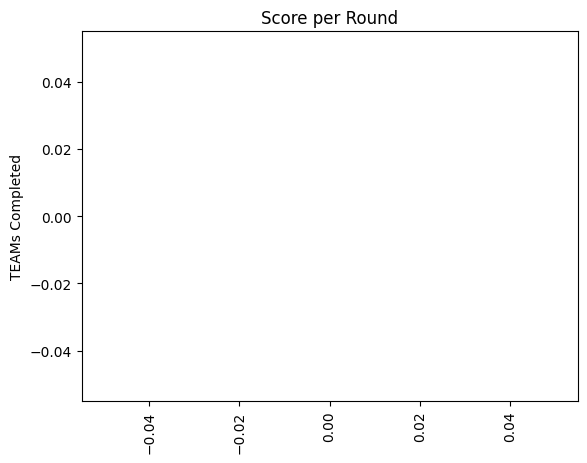

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
print(df.columns)
# Load your CSV file (update the name if needed)
#df = pd.read_csv("jn_data_v1.csv")
df = pd.read_csv("jn_data_v1.csv", header=None)

df.columns = [
    "session_id", "round_id", "timestamp_ms", "letter_shown", "button_pressed", 
    "correct_press", "missed_opportunity", "vibration_event", "vibration_duration_ms", 
    "vibration_count", "score"
]


# df.columns = [
#    "session_id", "round_id", "timestamp_ms", "letter_shown", "button_pressed", 
#    "correct_press", "missed_opportunity", "vibration_event", "vibration_duration_ms", 
#    "vibration_count", "progress", "score", "time_left_ms"
#]

df["timestamp_ms"] = pd.to_numeric(df["timestamp_ms"], errors='coerce')
df["timestamp_ms"] = pd.to_numeric(df["timestamp_ms"], errors='coerce')
df.dropna(subset=["timestamp_ms", "score", "round_id"], inplace=True)

# Convert key columns to numeric
numeric_cols = ["score", "round_id", "timestamp_ms", "vibration_duration_ms", "vibration_count"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop any rows with NaN in those critical fields (optional)
df.dropna(subset=["score", "round_id"], inplace=True)


df["timestamp_sec"] = df["timestamp_ms"] / 1000
df["time_elapsed"] = df["timestamp_sec"] - df.groupby("round_id")["timestamp_sec"].transform("min")

# Summary
print("Sessions:", df["session_id"].nunique())
print("Rounds:", df["round_id"].nunique())
print("Total button presses:", df["button_pressed"].sum())
print("Correct presses:", df["correct_press"].sum())
print("Missed opportunities:", df["missed_opportunity"].sum())

# Plot scores
# df.groupby("round_id")["score"].max().plot(kind='bar', title="Score per Round", ylabel="TEAMs Completed", xlabel="Round")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


df.groupby("round_id")["score"].max().plot(
    kind='bar', 
    title="Score per Round", 
    ylabel="TEAMs Completed", 
    xlabel="Round"
)
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd

df = pd.read_csv("jn_data_cleaned.csv")
df.head()


,timestamp_ms,letter_shown,button_pressed,correct_press,missed_opportunity,vibration_event,vibration_duration_ms,vibration_count,progress,score,time_left_ms,round_id
0,1963645,A,1,0,0,1,1963744,0,NaN,0,59998,0
1,1963645,A,0,0,0,1,99,1,NaN,0,59998,0
2,1966470,T,1,1,0,1,2925,1,T,0,57173,0
3,1968978,E,1,1,0,1,5433,1,TE,0,54665,0
4,1974120,A,1,1,0,1,10575,1,TEA,0,49523,0


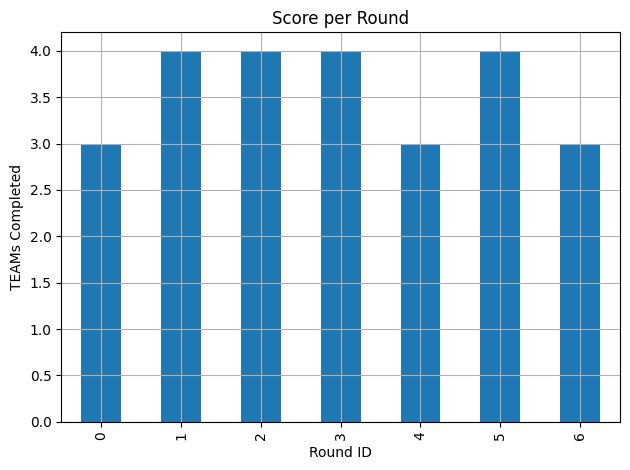

In [10]:
import matplotlib.pyplot as plt

df.groupby("round_id")["score"].max().plot(kind='bar', title="Score per Round")
plt.ylabel("TEAMs Completed")
plt.xlabel("Round ID")
plt.grid(True)
plt.tight_layout()
plt.show()


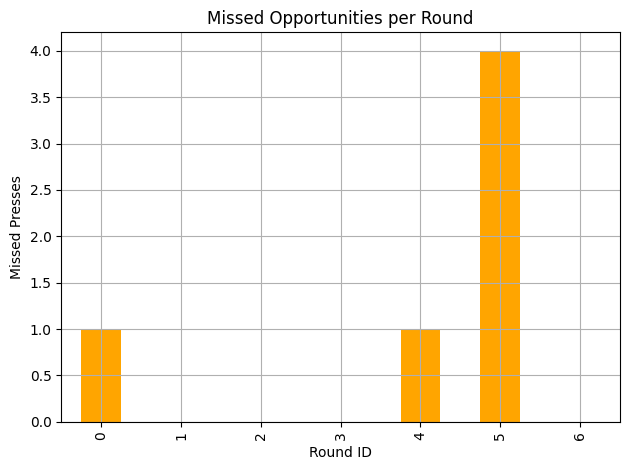

In [11]:
df.groupby("round_id")["missed_opportunity"].sum().plot(
    kind='bar', color='orange', title="Missed Opportunities per Round"
)
plt.ylabel("Missed Presses")
plt.xlabel("Round ID")
plt.grid(True)
plt.tight_layout()
plt.show()


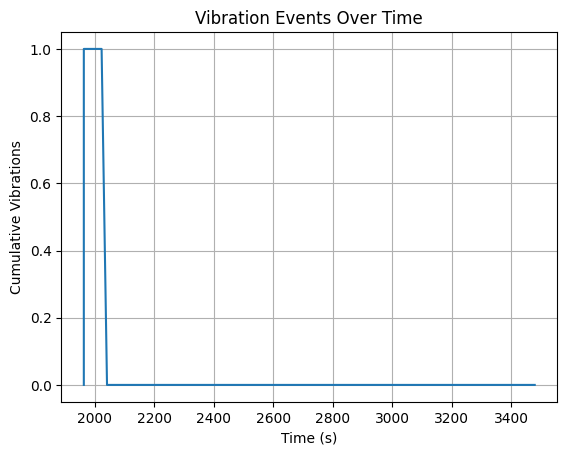

In [12]:
df["timestamp_sec"] = df["timestamp_ms"] / 1000
df[df["vibration_event"] == 1].plot(
    x="timestamp_sec", y="vibration_count", title="Vibration Events Over Time", legend=False
)
plt.xlabel("Time (s)")
plt.ylabel("Cumulative Vibrations")
plt.grid(True)
plt.show()


In [13]:
import pandas as pd

df = pd.read_csv("jn_data_cleaned.csv")
df.head()


,timestamp_ms,letter_shown,button_pressed,correct_press,missed_opportunity,vibration_event,vibration_duration_ms,vibration_count,progress,score,time_left_ms,round_id,time_diff
0,1963645,A,1,0,0,1,1963744,0,NaN,0,59998,0,0.0
1,1963645,A,0,0,0,1,99,1,NaN,0,59998,0,0.0
2,1966470,T,1,1,0,1,2925,1,T,0,57173,0,2825.0
3,1968978,E,1,1,0,1,5433,1,TE,0,54665,0,2508.0
4,1974120,A,1,1,0,1,10575,1,TEA,0,49523,0,5142.0
